<a href="https://www.kaggle.com/code/mohitrajemdramahajan/digit-classification-using-mnist?scriptVersionId=285999375" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Digit Classification using MNIST Dataset The Official Keras Deep Neural Network Example for CNN
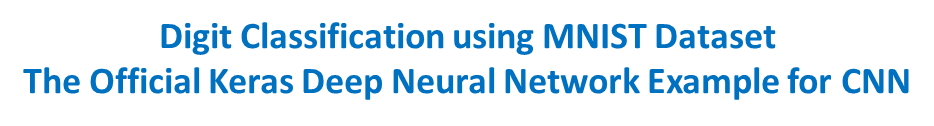

https://keras.io/examples/vision/mnist_convnet/ 




In [1]:
# conda install  TensorFlow
# The Official Keras Deep Neural Network Example for CNN 
###############################
# 1. Setting Seed Random Number for Reproducibility
import numpy as np
import pandas as pd
np.random.seed(123)  # for reproducibility

# 2. Setting Seed Random Number for the TensorFlow Backend
import tensorflow as tf
tf.random.set_seed(123) # for reproducibility

# 3. Import libraries and modules
from tensorflow import keras
from tensorflow.keras import layers
#from keras.utils import np_utils # old import place
from tensorflow.keras.utils import to_categorical
display("SetUp Completed!")

'SetUp Completed!'

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


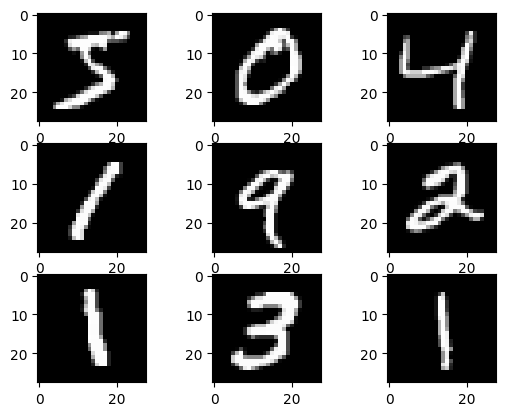

In [2]:
# 4. Load MNIST data into train and test sets
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

import matplotlib.pyplot as plt
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
# 5. Preprocess input data
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255



In [4]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [5]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

60000 train samples
10000 test samples


In [6]:
print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28, 1)


Keras requires your output variable to be one-hot encoded values in the case of multy-classification.

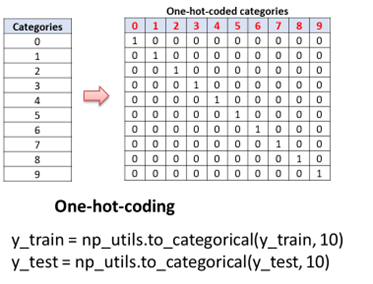

**One-hot encoding** is necessary if you use **categorical_crossentropy loss** when training the model. However if you use **sparse_categorical_crossentropy** then you can skip this step. 

In [7]:
# 6. Preprocess class labels
# Keras requires your output variable to be one-hot encoded values 
# in the case of multy-classification. 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
print("y_train shape:", y_train.shape)

y_train shape: (60000, 10)


# Question: Design the following Convolutional Neural Network (CNN)  

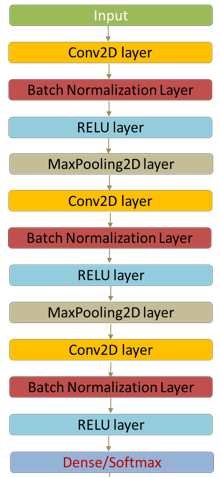
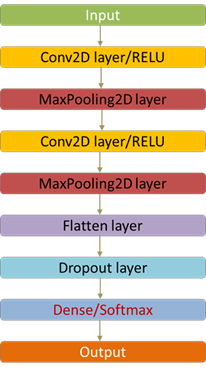


* **Input Layer** An Input layer is where you specify the image size, which, in this case, is 28-by-28-by-1. These numbers correspond to the height, width, and the channel size. The digit data consists of grayscale images, so the channel size (color channel) is 1. For a color image, the channel size is 3, corresponding to the RGB values.
* **Convolutional Layer** In the convolutional layer, the first argument is number of the filters, which is the number of neurons that connect to the same region of the input. This parameter determines the number of feature maps. The second argument is filter size, which is the height and width of the filters the training function uses while scanning along the images. In this example, the numbers (3,3) indicates that the **filter size is 3-by-3**. You can specify different sizes for the height and width of the filter. For this desin use **"same" padding** option. It ensures that the spatial output size is the same as the input size.
  In the first Convolutional layer use 8, in the second block use 16 in the third block use 32 filters with filter size of 3 by 3 and same padding options. 
*  **Batch Normalization Layer** Batch normalization layers normalize the activations and gradients propagating through a neural network, making neural network training an easier optimization problem. Use batch normalization layers between convolutional layers and nonlinearities, such as ReLU layers, to speed up neural network training and reduce the sensitivity to neural network initialization.  
*  **ReLU Layer** The batch normalization layer is followed by a nonlinear activation function. The most common activation function is the rectified linear unit (ReLU).
*  **Max Pooling Layer** Convolutional layers (with activation functions) are sometimes followed by a down-sampling operation that reduces the spatial size of the feature map and removes redundant spatial information. Down-sampling makes it possible to increase the number of filters in deeper convolutional layers without increasing the required amount of computation per layer. The max pooling layer returns the maximum values of rectangular regions of inputs, specified by the first argument, **pool_size**. In this lab assignment, the pool size is (2,2) and **strides** parameter is set to 2.
*  **Dense Layer (Fully Connected Neurons)** The convolutional and down-sampling layers are followed by one or more fully connected layers. As its name suggests, a fully connected layer is a layer in which the neurons connect to all the neurons in the preceding layer. This layer combines all the features learned by the previous layers across the image to identify the larger patterns. The last fully connected layer combines the features to classify the images. Therefore, the Output Size  in the last fully connected layer is equal to the number of classes in the target data. In this example, the output size is 10, corresponding to the 10 classes.
*  **Softmax Layer** The softmax activation function normalizes the output of the fully connected layer. The output of the softmax layer consists of positive numbers that sum to one, which can then be used as classification probabilities by the classification layer. 
ayer. 



In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, Flatten, Dense, Softmax
from tensorflow.keras.optimizers import SGD

model = Sequential(
    [
        # Input: (28, 28, 1)
    Input(shape=(28, 28, 1)),
    
    # Block 1
    Conv2D(32, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2)), 
# reduces the 4X4 matrix to the 2X2 matrix which reduce the numbers by 4 times
# for example the Feature map: 28×28×32 = 25,088 values but after using pooling we got Feature map: 14×14×32 = 6,272 values.
    
    # Block 2
    Conv2D(64, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Block 3
    Conv2D(128, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    ReLU(),
    
    # Fully Connected            #We have 2 hidden layers and 128 and 10 as neurons(O|P Layer).
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897,802 (3.42 MB)

 Trainable params: 897,354 (3.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
'''
# An example CNN DL model architecture
num_classes = 10
input_shape = (28, 28, 1)
# Build the CNN model
model = keras.Sequential(
    [
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3)),
        Relu(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"), 
    ]
)
# Summarize Model
model.summary()
'''

'\n# An example CNN DL model architecture\nnum_classes = 10\ninput_shape = (28, 28, 1)\n# Build the CNN model\nmodel = keras.Sequential(\n    [\n        Input(shape=input_shape),\n        Conv2D(32, kernel_size=(3, 3)),\n        Relu(),\n        MaxPooling2D(pool_size=(2, 2)),\n        Flatten(),\n        Dropout(0.5),\n        Dense(num_classes, activation="softmax"), \n    ]\n)\n# Summarize Model\nmodel.summary()\n'

In [11]:
# 8. Compile model
batch_size = 32 
epochs = 15 
model.compile(optimizer=SGD(learning_rate=0.01), #initial_learning_rate  # other option is "adam",
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 9. Training (Fitting the model on training data, dont forget to use the validation data)

history = model.fit(x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1)

# Accuracy is 1.0 with minimum loss is just Bcoz of overfitting.


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 73s 48ms/step - accuracy: 0.9180 - loss: 0.2684 - val_accuracy: 0.9780 - val_loss: 0.0746
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 47ms/step - accuracy: 0.9858 - loss: 0.0494 - val_accuracy: 0.9832 - val_loss: 0.0575
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 47ms/step - accuracy: 0.9912 - loss: 0.0317 - val_accuracy: 0.9839 - val_loss: 0.0539
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 73s 48ms/step - accuracy: 0.9943 - loss: 0.0220 - val_accuracy: 0.9857 - val_loss: 0.0499
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 48ms/step - accuracy: 0.9966 - loss: 0.0155 - val_accuracy: 0.9868 - val_loss: 0.0454
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 47ms/step - accuracy: 0.9978 - loss: 0.0111 - val_accuracy: 0.9872 - val_loss: 0.0419
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - accuracy: 0.9990 - loss: 0.0081 - val_accuracy: 0.9876 - val_loss: 0.0399
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 47ms/step - accuracy: 0.9996 -

In [12]:
# 10. Evaluate model on test data
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(x_test,  y_test, batch_size=256, verbose=1)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9894 - loss: 0.0343
Test loss: 0.02669473923742771
Test accuracy: 0.9919000267982483
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9894 - loss: 0.0343
Test loss: 0.0267 accuracy: 0.9919


In [13]:
# 11. Using the trained model for predictions (scoring)
# Predict on the first 5 test images.
predictions = model.predict(x_test[:5])
# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(y_test[:5]) # [7, 2, 1, 0, 4]
print(np.argmax(y_test[:5], axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
[7 2 1 0 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[7 2 1 0 4]


In [14]:
# Monitorting and interpreting the training process
pd.DataFrame(history.history).head()

,accuracy,loss,val_accuracy,val_loss
0,0.961375,0.128598,0.978000,0.074642
1,0.987521,0.043669,0.983167,0.057510
2,0.992500,0.028569,0.983917,0.053881
3,0.995208,0.019959,0.985667,0.049911
4,0.996958,0.014289,0.986833,0.045407


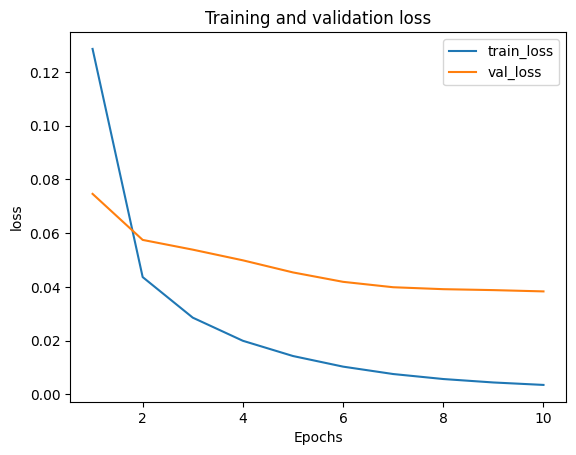

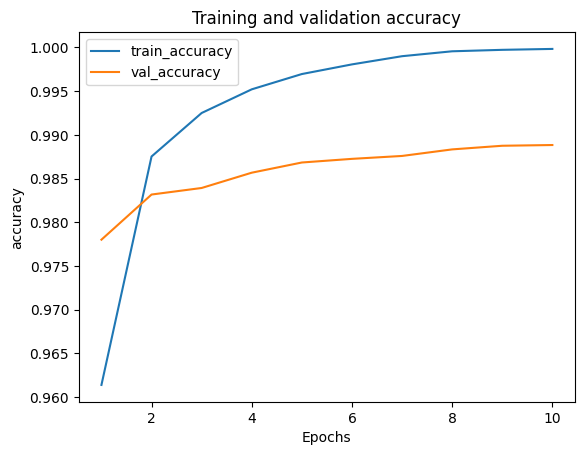

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [15]:
# Interpreting validation set results
import matplotlib.pyplot as plt
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

print(history.history.keys())
#print(history.history)
#print(history.history['accuracy'] )
#print(history.history['loss'] )
#print(history.history['val_loss'] )
#print(history.history['val_accuracy'] )

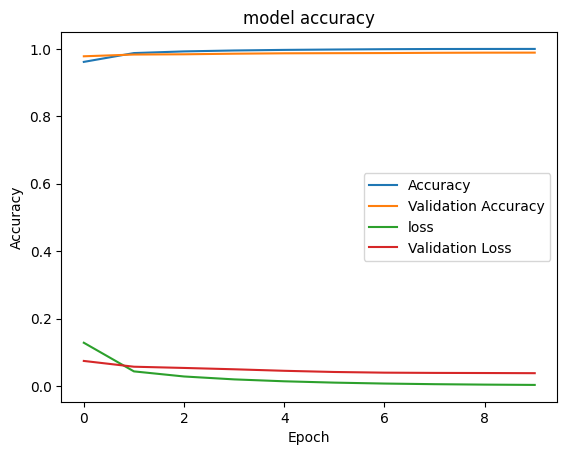

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

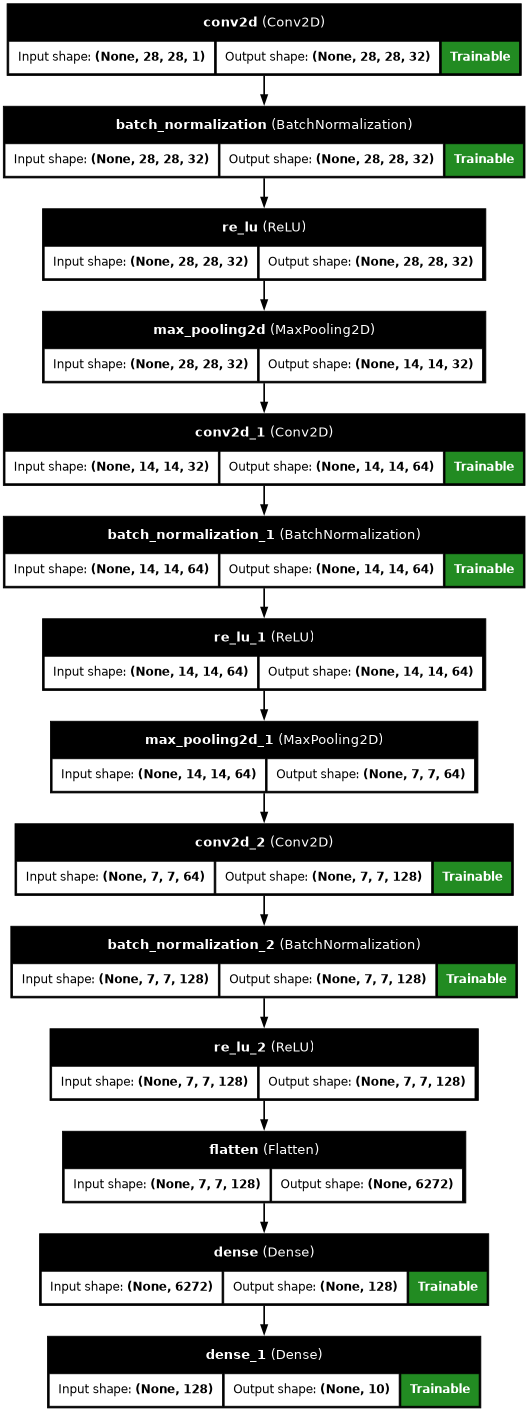

In [17]:
# Visualize Model
#from keras.utils.vis_utils import plot_model # old import place
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=60,show_trainable=True)

In [18]:
from sklearn.metrics import classification_report
predicted_classes = model.predict(x_test)
NUM_CLASSES = 10
labels = [0,1,2,3,4,5,6,7,8,9]
target_names = ['zero','one','two','three','four','five','six','seven','eight','nine']
# https://www.kaggle.com/code/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist/notebook
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(predicted_classes, axis=1), 
                            target_names=target_names
                           ))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

        zero       0.99      1.00      0.99       980
         one       0.99      1.00      1.00      1135
         two       0.99      1.00      0.99      1032
       three       0.99      0.99      0.99      1010
        four       0.99      0.99      0.99       982
        five       0.99      0.99      0.99       892
         six       1.00      0.99      0.99       958
       seven       0.99      0.99      0.99      1028
       eight       1.00      0.98      0.99       974
        nine       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Confussion matrix for checking the model's preditions

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


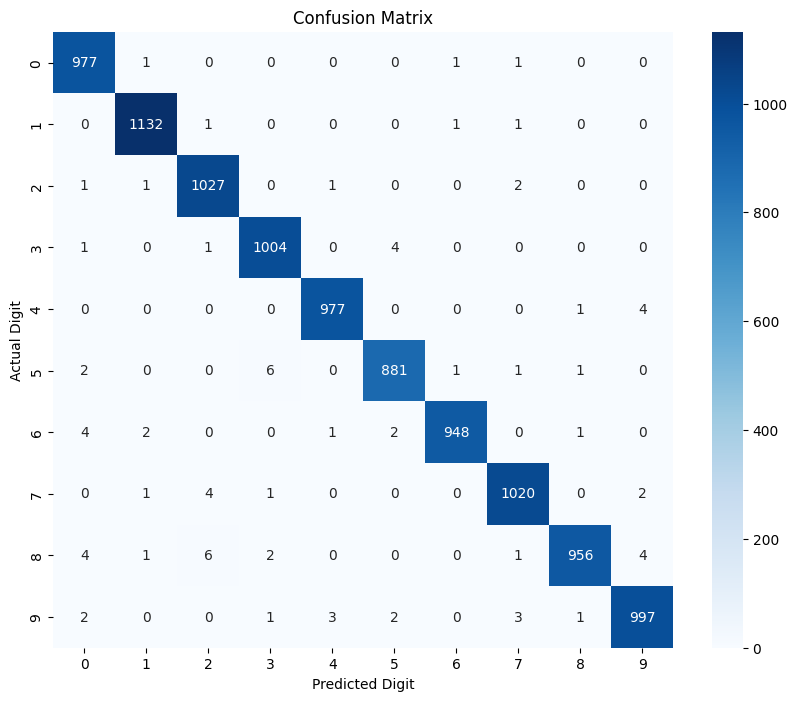

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on test set
predictions = model.predict(x_test)



# Get predicted classes
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('Actual Digit')
plt.xlabel('Predicted Digit')
plt.show()